###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot
np.random.seed(1337)
random.seed(1337)

#### Neuron

number of inputs:  1
Neuron:  LinearNeuron(1)
weights:  [Value(name=val1,neuronnumber=n,weightnumber=,type=w1,data=0.23550571390294128, grad=0)]
b:  Value(name=val2,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)
b type:  b
number of parameters  2
[Value(name=val1,neuronnumber=n,weightnumber=,type=w1,data=0.23550571390294128, grad=0), Value(name=val2,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val3,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
number of Value objects created =  5
activation:  Value(name=val5,neuronnumber=n,weightnumber=,type=a,data=0.23550571390294128, grad=0)


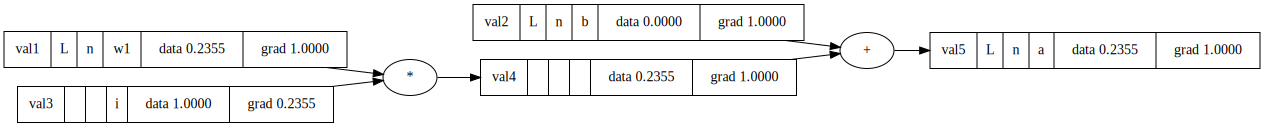

In [2]:
nin=1  #number of inputs

Value.value_counter=0

myNeuron=Neuron(nin,nonlin=False)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b type: ",myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation=myNeuron(xinput)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
activation.backward()
draw_dot(activation)

## Gradient

[Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.06653114721000164, grad=0), Value(name=val2,neuronnumber=n1,weightnumber=,type=w2,data=-0.26830328150124894, grad=0), Value(name=val3,neuronnumber=n1,weightnumber=,type=w3,data=0.1715747078045431, grad=0), Value(name=val4,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
[Value(name=val5,neuronnumber=n2,weightnumber=,type=w1,data=-0.6686254326224383, grad=0), Value(name=val6,neuronnumber=n2,weightnumber=,type=w2,data=0.6487474938152629, grad=0), Value(name=val7,neuronnumber=n2,weightnumber=,type=w3,data=-0.23259038277158273, grad=0), Value(name=val8,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val9,neuronnumber=,weightnumber=,type=i,data=1, grad=0), Value(name=val10,neuronnumber=,weightnumber=,type=i,data=2, grad=0), Value(name=val11,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
activation1  Value(name=val17,neuronnumber=n1,weightnumber=,type=a,data=0.044648707621133044, grad=0)
activat

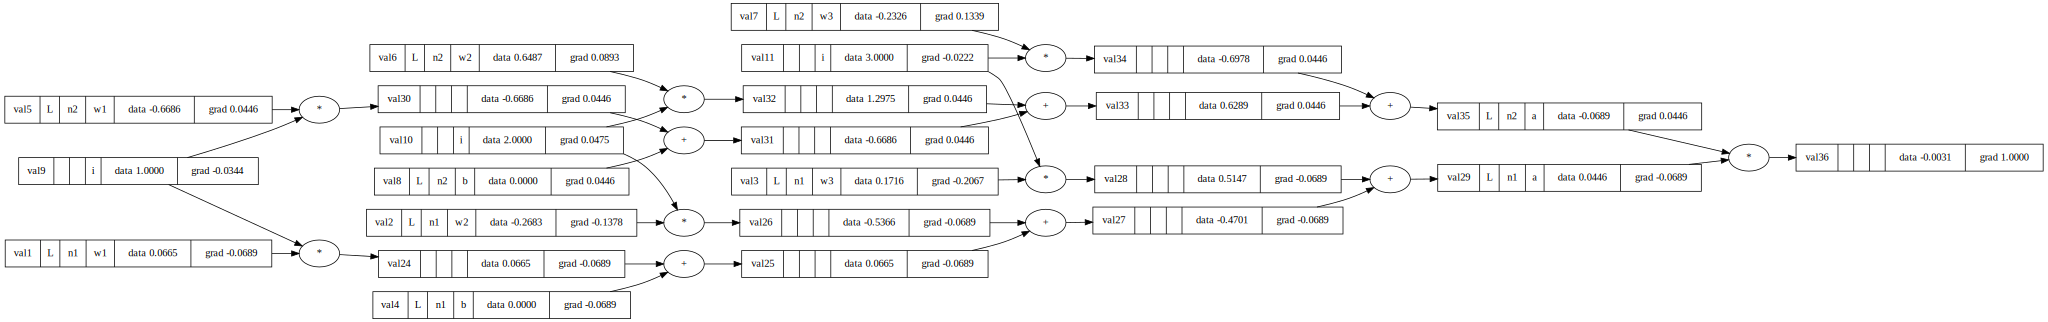

In [3]:
nin = 3  # number of inputs
Value.value_counter = 0

myNeuron1 = Neuron(nin, neuronnumber="n1", nonlin=False)
myNeuron2 = Neuron(nin, neuronnumber="n2", nonlin=False)
print(myNeuron1.parameters())
print(myNeuron2.parameters())

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

activation1=myNeuron1(xinput)
print("activation1 ",activation1)
activation2=myNeuron2(xinput)
print("activation2 ",activation2)

loss = myNeuron1(xinput) * myNeuron2(xinput)
print("number of Value objects created = ", Value.value_counter)

print("loss=", loss)

loss.backward()

draw_dot(loss)